compare selected features between s3d and random forest (CART) for stackexchange and digg

---

In [1]:
import scipy as sp
import pandas as pd

In [2]:
import palettable
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
color_list = pd.np.asarray(palettable.cartocolors.qualitative.Bold_7.mpl_colors)
color_list = color_list[[3,1,0]]

In [4]:
import json
name_pair_dict = json.load(open("../data/name_pair.json"))
name_pair_dict.keys()

dict_keys(['appenergy', 'boston_housing', 'breastcancer', 'breastcancer_reg', 'building_costs', 'building_sales', 'digg', 'duolingo_cleaned', 'parkinsons', 'parkinsons_motor', 'parkinsons_total', 'spambase', 'spectf', 'stackoverflow_cleaned_subset', 'triazines', 'khan_cleaned', 'twitter', 'pol'])

In [5]:
s3d_hyperparameter_df = pd.read_csv('s3d_hyperparameter_df.csv')
s3d_hyperparameter_df.columns = ['data_name', 'type_', 'split_version', 'lambda_', 'num_features']
s3d_hyperparameter_df.head(2)

,data_name,type_,split_version,lambda_,num_features
0,breastcancer,classification,0,0.0010,2
1,breastcancer,classification,1,0.0003,1


---

### stackexchange

find out feature importance (or selected features) for stackexchange data

In [6]:
data_name = 'stackoverflow_cleaned_subset'

#### multicollinearity

In [7]:
df = pd.read_csv('../data/{}.csv'.format(data_name))
df.head(2)

,target,percentile,signup_duration,words,code_lines,urls,images,readability,reputation,session_length,answer_position_in_session,number_of_ans_wrote_by_user_before_this,time_since_previous_answer
0,0,0.022635,34450.0,196,0,0,0,96.18,1.0,1,1,0,-1.0
1,0,0.045840,303756.0,113,0,1,0,75.54,119.0,1,1,1,269306.0


In [8]:
corr_df = df[df.columns].corr()
corr_df.index = corr_df.columns.values.copy()
mask = pd.np.zeros_like(corr_df, dtype=pd.np.bool)
mask[pd.np.triu_indices_from(mask, k=1)] = True

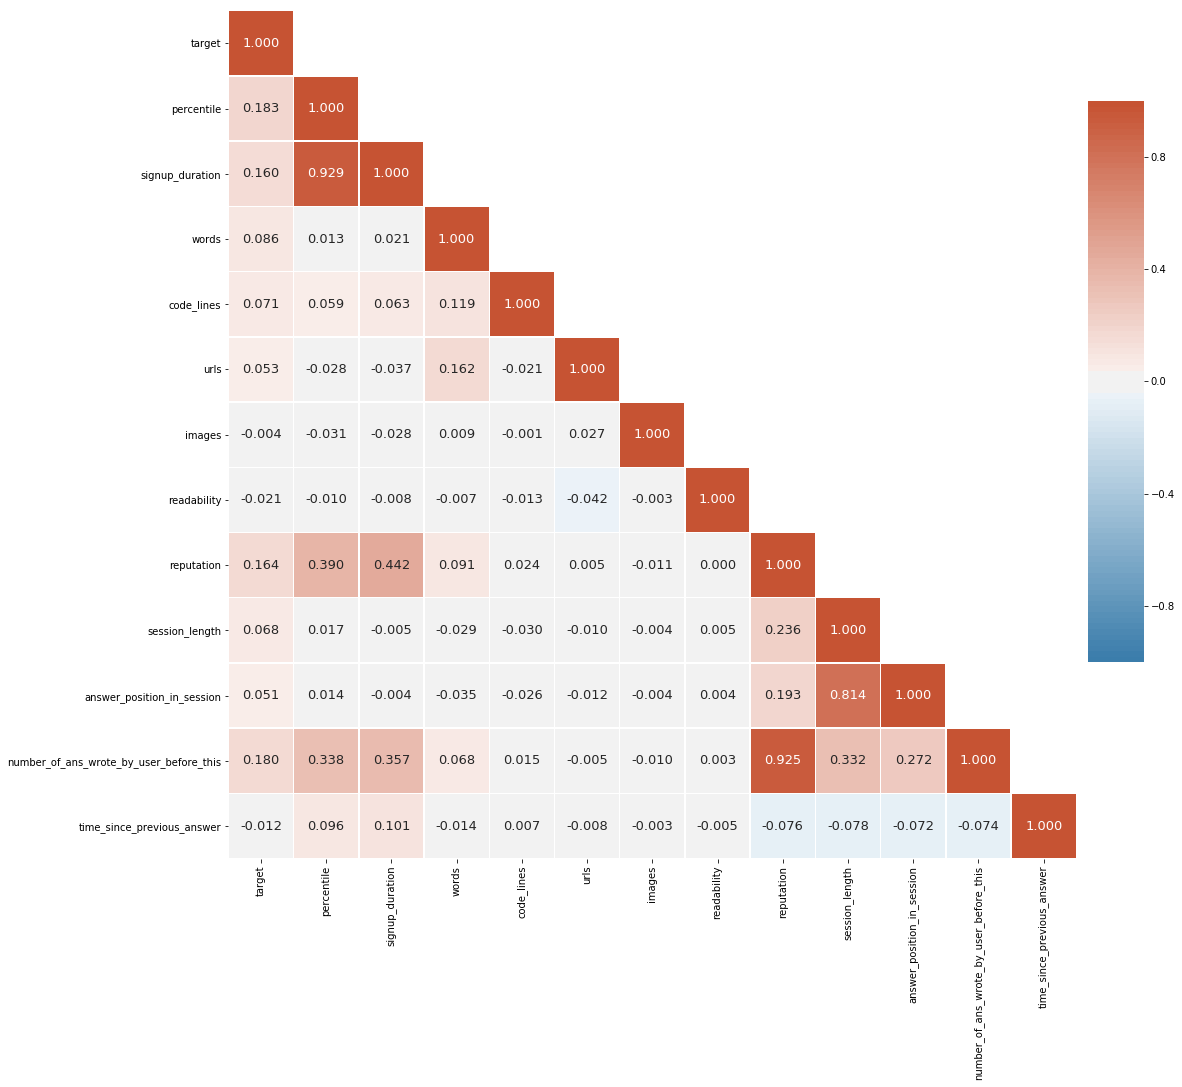

In [9]:
fig, ax = plt.subplots(figsize=[len(corr_df.columns)*1.2]*2)
cbar_ax = fig.add_axes([.9, .3, .05, .5])
sns.heatmap(corr_df, square=True, ax=ax, 
            annot=corr_df.values, fmt='.3f',
            annot_kws={"size": 13},
            cbar_ax=cbar_ax,
            mask=mask,
            linewidth=0.5,
            vmax=1, vmin=-1,
            #cmap=sns.color_palette('Blues', desat=0.6))
            cmap=sns.diverging_palette(240, 20, s=80, n=100))
#_ = ax.xaxis.set_ticklabels(ticklabels=col_names, rotation=55)
#_ = ax.yaxis.set_ticklabels(ticklabels=col_names, rotation=0)

#### random forest

find out feature importance (or selected features) by random forests

In [10]:
fn = 'classification/bm-performance/{}-randomforest-feature_rankings.csv'.format(data_name)
df = pd.read_csv(fn, index_col=0)
df['fold_index'] = df['fold_index'].astype(int)
df

,percentile,signup_duration,words,code_lines,urls,images,readability,reputation,session_length,answer_position_in_session,number_of_ans_wrote_by_user_before_this,time_since_previous_answer,fold_index
0,0.147333,0.143740,0.113774,0.066120,0.022081,0.000208,0.100629,0.129576,0.022664,0.011807,0.126161,0.115907,0
1,0.149147,0.142408,0.114348,0.066413,0.021533,0.000204,0.100352,0.130447,0.022497,0.011898,0.124215,0.116539,1
2,0.152195,0.142284,0.113305,0.068436,0.021310,0.000207,0.100331,0.128265,0.023096,0.012043,0.123172,0.115356,2
3,0.145223,0.141239,0.115401,0.061115,0.020456,0.000193,0.104061,0.131511,0.023019,0.011773,0.125266,0.120745,3
4,0.148013,0.143923,0.114215,0.066810,0.022124,0.000218,0.100071,0.130382,0.022936,0.011899,0.124115,0.115295,4


obtain mean scores across folds

In [11]:
rf_mean_scores = df.mean(axis=0).drop(index='fold_index')
rf_mean_scores

percentile                                 0.148382
signup_duration                            0.142719
words                                      0.114209
code_lines                                 0.065779
urls                                       0.021501
images                                     0.000206
readability                                0.101089
reputation                                 0.130036
session_length                             0.022842
answer_position_in_session                 0.011884
number_of_ans_wrote_by_user_before_this    0.124586
time_since_previous_answer                 0.116768
dtype: float64

#### s3d

s3d

In [12]:
fn_base = 'models/{}/{}/levels.csv'.format(data_name,'{}')
fn_base

'models/stackoverflow_cleaned_subset/{}/levels.csv'

In [13]:
s3d_levels = list()
for fold_index in range(5):
    fn = fn_base.format(fold_index)
    levels_df = pd.read_csv(fn, index_col=0)['R2']
    df = levels_df.diff()
    df.iloc[0] = levels_df.iloc[0]
    df.name = ''
    #print(df.)
    #df['fold_index'] = fold_index
    s3d_levels.append(df)
s3d_levels = pd.DataFrame(s3d_levels)
s3d_levels

best_feature,percentile,code_lines,words,urls,number_of_ans_wrote_by_user_before_this
,0.032007,0.009839,0.008176,0.003915,0.003868
,0.032007,0.009839,0.008176,0.003915,0.003867
,0.032007,0.009839,0.008176,0.003915,0.003867
,0.032007,0.009839,0.008176,0.003915,0.003867
,0.032006,0.009840,0.008176,0.003915,0.003867


In [14]:
s3d_mean_scores = s3d_levels.mean(axis=0, skipna=True)
s3d_mean_scores

best_feature
percentile                                 0.032007
code_lines                                 0.009839
words                                      0.008176
urls                                       0.003915
number_of_ans_wrote_by_user_before_this    0.003867
dtype: float64

normalize s3d scores so that they sum up to 1

In [15]:
s3d_mean_scores = s3d_mean_scores/s3d_mean_scores.sum()
s3d_mean_scores

best_feature
percentile                                 0.553708
code_lines                                 0.170219
words                                      0.141439
urls                                       0.067728
number_of_ans_wrote_by_user_before_this    0.066906
dtype: float64

#### merge scores

In [16]:
mean_scores = pd.DataFrame({'rf': rf_mean_scores,
                            's3d': s3d_mean_scores,
                           })
mean_scores.fillna(0, inplace=True)
## sort by s3d
mean_scores.sort_values('s3d', inplace=True, ascending=False)
mean_scores

,rf,s3d
percentile,0.148382,0.553708
code_lines,0.065779,0.170219
words,0.114209,0.141439
urls,0.021501,0.067728
number_of_ans_wrote_by_user_before_this,0.124586,0.066906
answer_position_in_session,0.011884,0.000000
images,0.000206,0.000000
readability,0.101089,0.000000
reputation,0.130036,0.000000
session_length,0.022842,0.000000


In [17]:
mean_scores.sum()

rf     1.0
s3d    1.0
dtype: float64

#### visualize

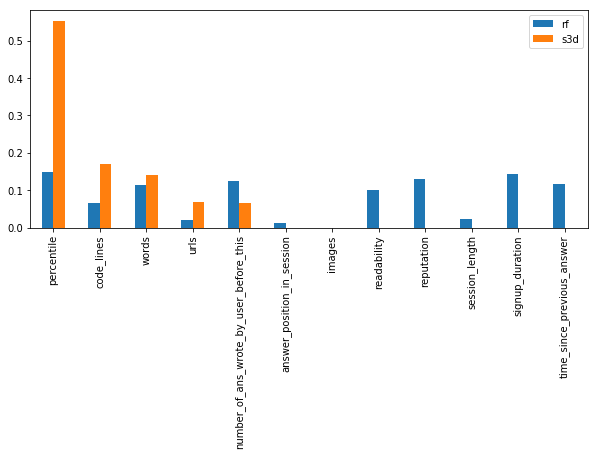

In [18]:
fig, ax = plt.subplots(figsize=[10,4])
mean_scores.plot(kind='bar', ax=ax)

scatter plot and correlation

In [19]:
mean_scores.corr()

,rf,s3d
rf,1.0000,0.3687
s3d,0.3687,1.0000


In [20]:
mean_scores.corr(method='spearman')

,rf,s3d
rf,1.000000,0.226142
s3d,0.226142,1.000000


/Users/zhiyzuo/.virtualenvs/Zuo-Py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


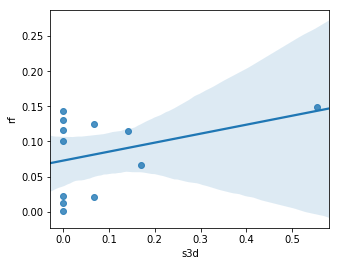

In [21]:
fig, ax = plt.subplots(figsize=[5, 4])
sns.regplot(x='s3d', y='rf', data=mean_scores, ax=ax)

---

### digg

find out feature importance (or selected features) for stackexchange data

In [22]:
data_name = 'digg'

#### multicollinearity

In [23]:
df = pd.read_csv('../data/{}.csv'.format(data_name))
df.head(2)

,target,day,hour,inv_exposure_rate,meme_age,meme_pop_current,meme_pop_recent,n_exposures,neighb_activity,neighb_indegree,neighb_info_received,neighb_outdegree,node_activity,node_indegree,node_info_received,node_outdegree,order,time_between_last_and_first_exposures,time_between_last_and_second_last_exposures,time_since_nodes_last_tweet
0,0,4,0,-1.0,49132,119,18,1,52,36,119,29,0,78,3630,77,2036,-1,-1,1.000000e+11
1,0,6,6,-1.0,8980,92,48,1,144,260,12110,112,0,156,6295,133,1725,-1,-1,1.000000e+11


In [24]:
corr_df = df[df.columns].corr()
corr_df.index = corr_df.columns.values.copy()
mask = pd.np.zeros_like(corr_df, dtype=pd.np.bool)
mask[pd.np.triu_indices_from(mask, k=1)] = True

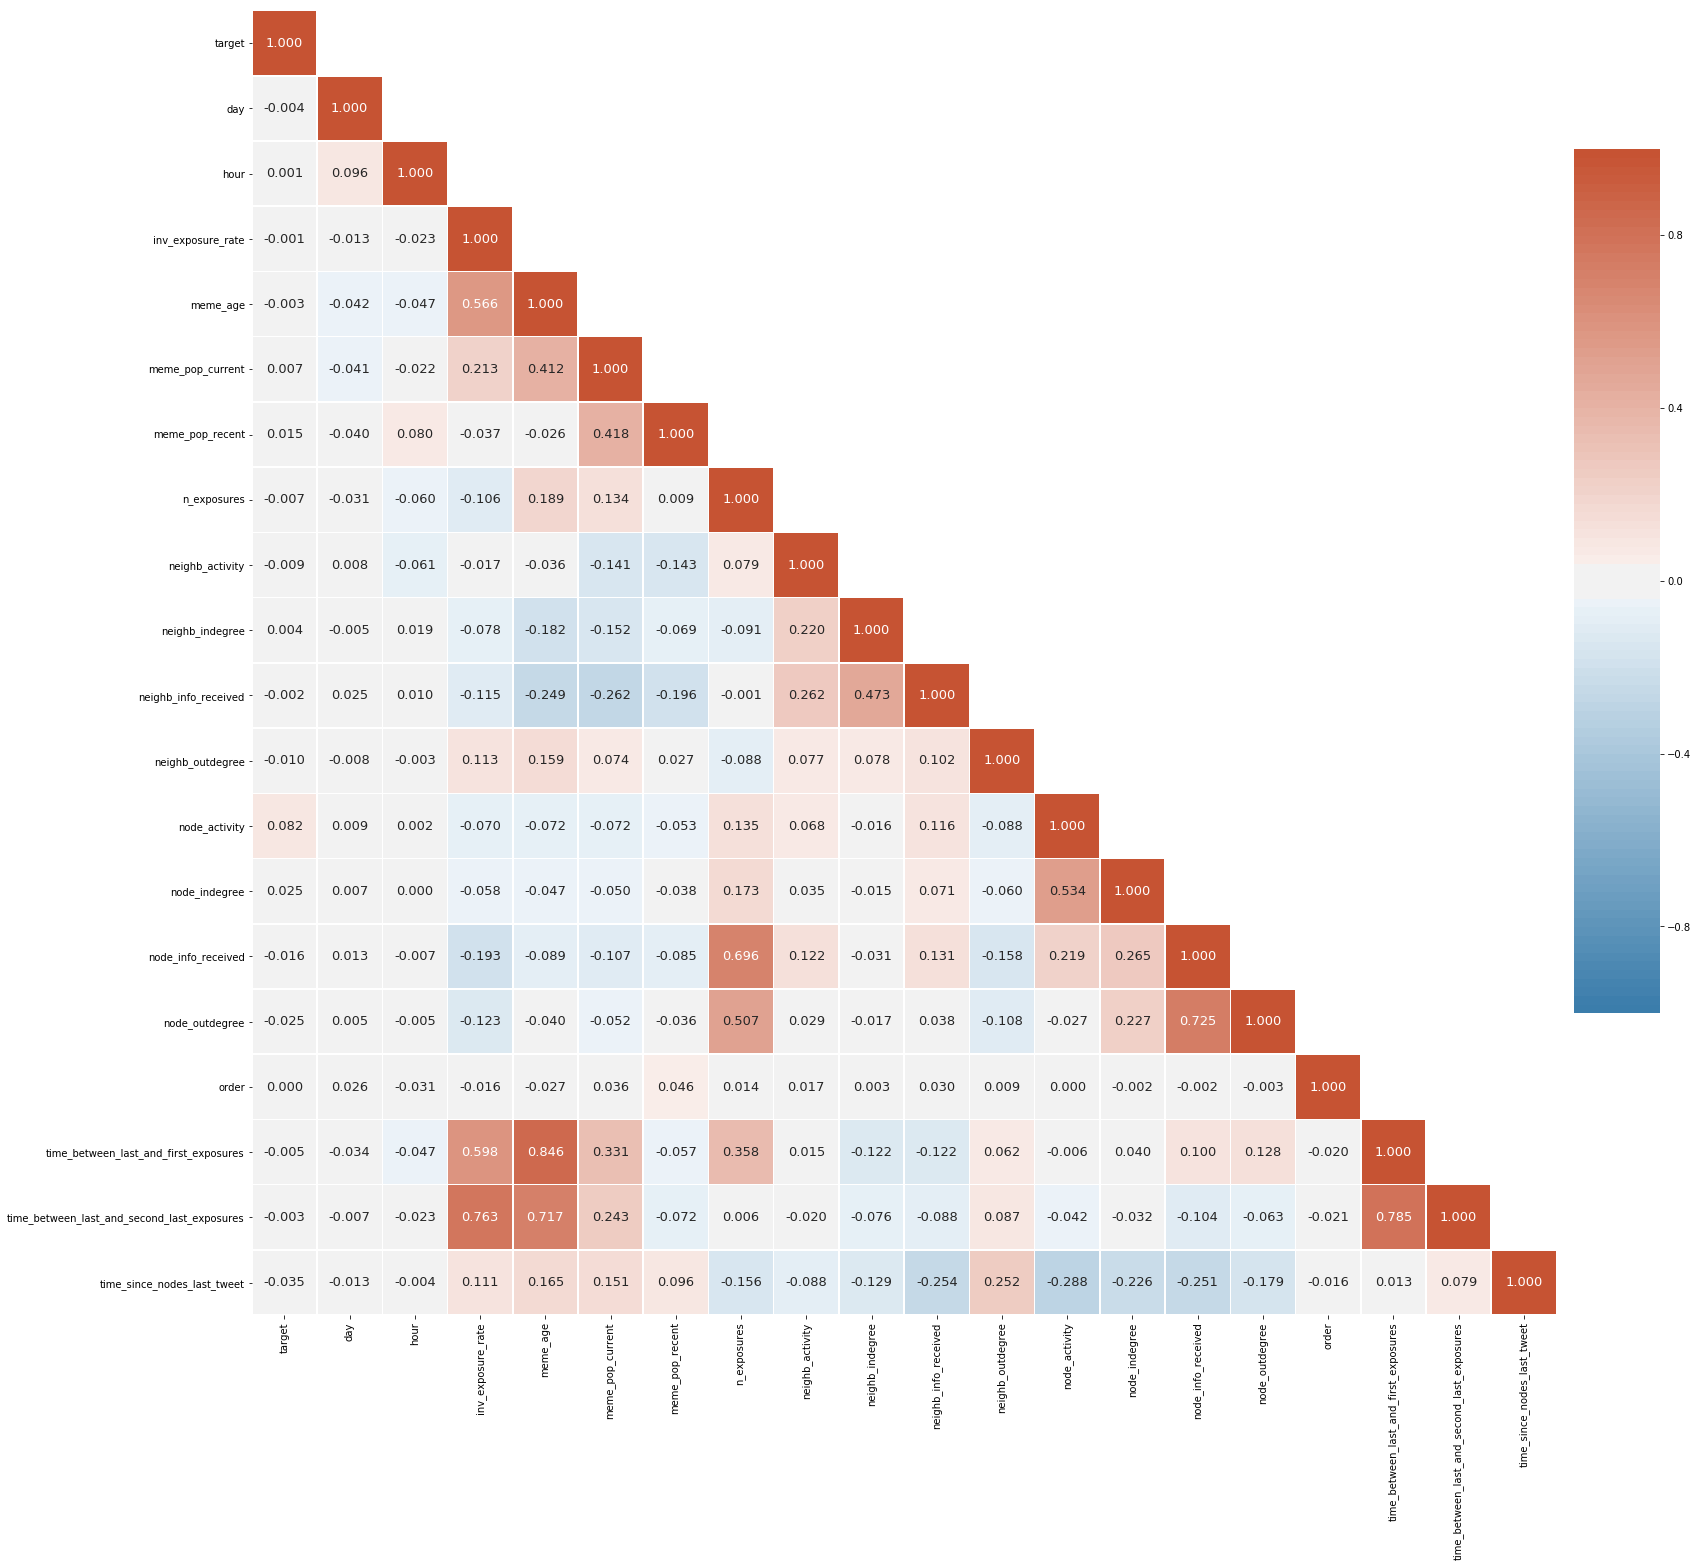

In [25]:
fig, ax = plt.subplots(figsize=[len(corr_df.columns)*1.2]*2)
cbar_ax = fig.add_axes([.9, .3, .05, .5])
sns.heatmap(corr_df, square=True, ax=ax, 
            annot=corr_df.values, fmt='.3f',
            annot_kws={"size": 13},
            cbar_ax=cbar_ax,
            mask=mask,
            linewidth=0.5,
            vmax=1, vmin=-1,
            #cmap=sns.color_palette('Blues', desat=0.6))
            cmap=sns.diverging_palette(240, 20, s=80, n=100))
#_ = ax.xaxis.set_ticklabels(ticklabels=col_names, rotation=55)
#_ = ax.yaxis.set_ticklabels(ticklabels=col_names, rotation=0)

#### random forest

find out feature importance (or selected features) by random forests

In [26]:
fn = 'classification/bm-performance/{}-randomforest-feature_rankings.csv'.format(data_name)
df = pd.read_csv(fn, index_col=0)
df['fold_index'] = df['fold_index'].astype(int)
df

,day,hour,inv_exposure_rate,meme_age,meme_pop_current,meme_pop_recent,n_exposures,neighb_activity,neighb_indegree,neighb_info_received,neighb_outdegree,node_activity,node_indegree,node_info_received,node_outdegree,order,time_between_last_and_first_exposures,time_between_last_and_second_last_exposures,time_since_nodes_last_tweet,fold_index
0,0.011916,0.023000,0.030439,0.032180,0.035188,0.031658,0.024477,0.032828,0.029937,0.029735,0.028627,0.278719,0.053942,0.067436,0.061448,0.030053,0.026480,0.027710,0.144227,0
1,0.014400,0.023917,0.031525,0.035549,0.036337,0.032409,0.024362,0.032866,0.034775,0.033615,0.032246,0.231550,0.062227,0.065376,0.069764,0.031095,0.027716,0.029722,0.150547,1
2,0.011677,0.022321,0.027128,0.032722,0.034155,0.031267,0.023870,0.032558,0.032153,0.031866,0.029889,0.252262,0.060054,0.065296,0.072604,0.028497,0.025074,0.027398,0.159210,2
3,0.012529,0.023153,0.028805,0.031149,0.034417,0.033511,0.022662,0.031719,0.033461,0.029860,0.029702,0.265804,0.051706,0.072886,0.064776,0.029855,0.026531,0.027795,0.149679,3
4,0.012540,0.022427,0.027778,0.031986,0.033358,0.029424,0.023766,0.031867,0.031709,0.030747,0.029032,0.259314,0.063760,0.064621,0.071957,0.028718,0.025543,0.027052,0.154401,4


obtain mean scores across folds

In [27]:
rf_mean_scores = df.mean(axis=0).drop(index='fold_index')
rf_mean_scores

day                                            0.012612
hour                                           0.022963
inv_exposure_rate                              0.029135
meme_age                                       0.032717
meme_pop_current                               0.034691
meme_pop_recent                                0.031654
n_exposures                                    0.023828
neighb_activity                                0.032368
neighb_indegree                                0.032407
neighb_info_received                           0.031165
neighb_outdegree                               0.029899
node_activity                                  0.257530
node_indegree                                  0.058338
node_info_received                             0.067123
node_outdegree                                 0.068110
order                                          0.029644
time_between_last_and_first_exposures          0.026269
time_between_last_and_second_last_exposures    0

#### s3d

s3d

In [28]:
fn_base = 'models/{}/{}/levels.csv'.format(data_name,'{}')
fn_base

'models/digg/{}/levels.csv'

In [29]:
s3d_levels = list()
for fold_index in range(5):
    fn = fn_base.format(fold_index)
    levels_df = pd.read_csv(fn, index_col=0)['R2']
    df = levels_df.diff()
    df.iloc[0] = levels_df.iloc[0]
    df.name = ''
    #print(df.)
    #df['fold_index'] = fold_index
    s3d_levels.append(df)
s3d_levels = pd.DataFrame(s3d_levels)
s3d_levels

,node_activity,node_info_received,hour
,0.012406,0.01914,0.007978
,0.012406,0.01914,NaN
,0.012406,0.01914,0.007978
,0.012406,0.01914,NaN
,0.012406,0.01914,0.007978


In [30]:
s3d_mean_scores = s3d_levels.mean(axis=0, skipna=True)
s3d_mean_scores

node_activity         0.012406
node_info_received    0.019140
hour                  0.007978
dtype: float64

normalize s3d scores so that they sum up to 1

In [31]:
s3d_mean_scores = s3d_mean_scores/s3d_mean_scores.sum()
s3d_mean_scores

node_activity         0.313882
node_info_received    0.484258
hour                  0.201861
dtype: float64

#### merge scores

In [32]:
mean_scores = pd.DataFrame({'rf': rf_mean_scores,
                            's3d': s3d_mean_scores,
                           })
mean_scores.fillna(0, inplace=True)
## sort by s3d
mean_scores.sort_values('s3d', inplace=True, ascending=False)
mean_scores

,rf,s3d
node_info_received,0.067123,0.484258
node_activity,0.257530,0.313882
hour,0.022963,0.201861
day,0.012612,0.000000
neighb_outdegree,0.029899,0.000000
time_between_last_and_second_last_exposures,0.027935,0.000000
time_between_last_and_first_exposures,0.026269,0.000000
order,0.029644,0.000000
node_outdegree,0.068110,0.000000
node_indegree,0.058338,0.000000


In [33]:
mean_scores.sum()

rf     1.0
s3d    1.0
dtype: float64

#### visualize

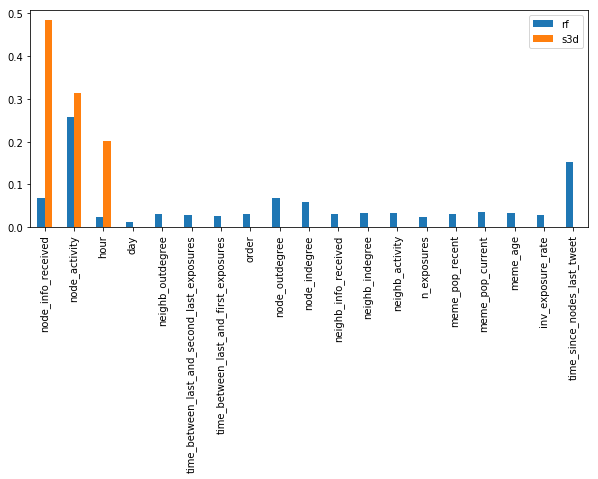

In [34]:
fig, ax = plt.subplots(figsize=[10,4])
mean_scores.plot(kind='bar', ax=ax)

scatter plot and correlation

In [35]:
mean_scores.corr()

,rf,s3d
rf,1.000000,0.467179
s3d,0.467179,1.000000


In [36]:
mean_scores.corr(method='spearman')

,rf,s3d
rf,1.000000,0.222328
s3d,0.222328,1.000000


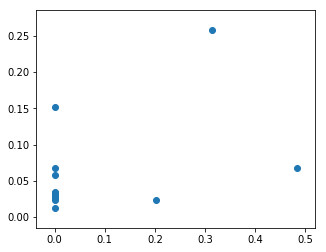

In [37]:
fig, ax = plt.subplots(figsize=[5, 4])
#sns.regplot(x='s3d', y='rf', data=mean_scores, ax=ax)
ax.scatter(mean_scores['s3d'], mean_scores['rf'])